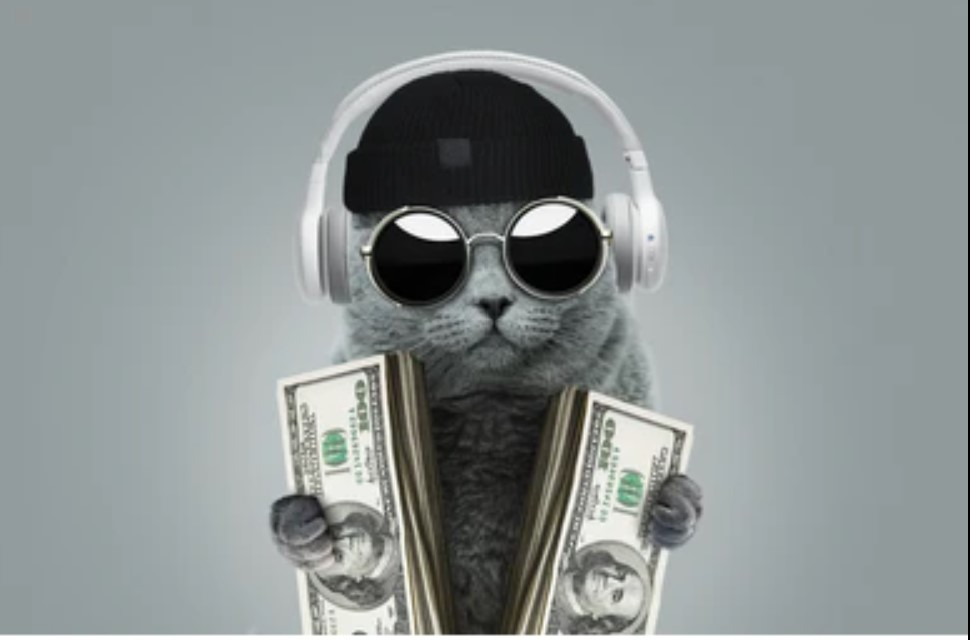

# Adult Income from US Census Bureau.

In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import os


## Sources:
Original owners of database US Census Bureau.
Ronny Kohavi and Barry Becker,
Data Mining and Visualization
Silicon Graphics.
e-mail: ronnyk@sgi.com
Date received 
05/19/96

#### Data Dictionary

*__age:__ continuous.

*__workclass:__ Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

*__education:__ Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

*__education-num:__  continuous.

*__marital-status:__ Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

_*_occupation:__ Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

*__gender:__ Female, Male.

*__hours-per-week:__ continuous.

*__native-country:__ United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

*__class:__  >50K, <=50K

In [2]:
df=pd.read_csv('adult.csv/adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
columns_to_delete=['fnlwgt','capital-gain','capital-loss']
df = df.drop(columns_to_delete, axis=1)

In [6]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [7]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [8]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [9]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [10]:
df = df[~(df == '?').any(axis=1)]

In [11]:
df['workclass'].value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   education        45222 non-null  object
 3   educational-num  45222 non-null  int64 
 4   marital-status   45222 non-null  object
 5   occupation       45222 non-null  object
 6   relationship     45222 non-null  object
 7   race             45222 non-null  object
 8   gender           45222 non-null  object
 9   hours-per-week   45222 non-null  int64 
 10  native-country   45222 non-null  object
 11  income           45222 non-null  object
dtypes: int64(3), object(9)
memory usage: 4.5+ MB


In [13]:
df['income'].value_counts().sort_values(ascending=True)

>50K     11208
<=50K    34014
Name: income, dtype: int64

In [14]:
df.head()


,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


## 1.	Who is in this data

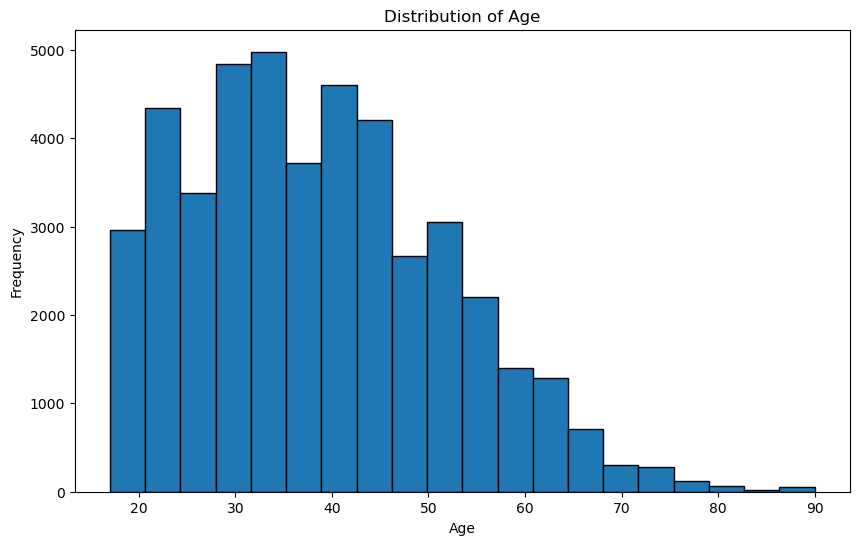

In [15]:
age_data = df['age']

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(age_data, bins=20, edgecolor='black')

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Display the plot
plt.show()

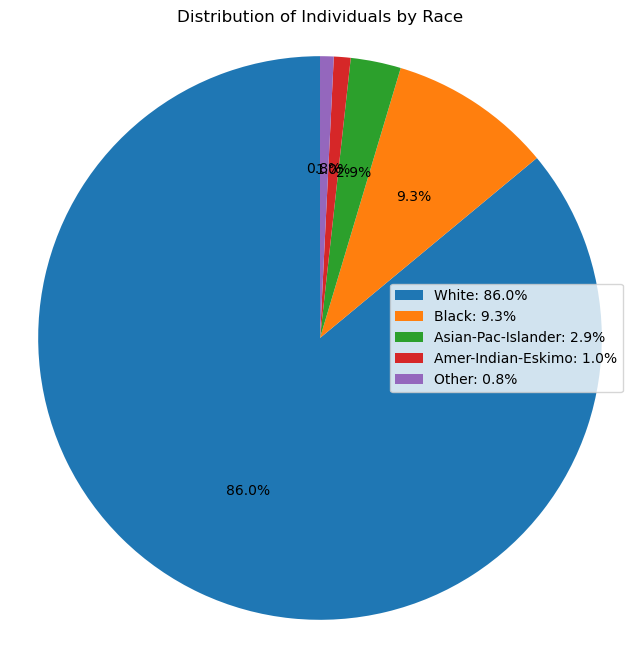

In [16]:
race_counts = df['race'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
patches, _, _ = plt.pie(race_counts, labels=None, autopct='%1.1f%%', startangle=90)

# Set plot title
plt.title('Distribution of Individuals by Race')

# Create a legend with race names and percentages
percentages = [f'{race_counts[i] / sum(race_counts) * 100:.1f}%' for i in range(len(race_counts))]
legend_labels = [f'{race_counts.index[i]}: {percentages[i]}' for i in range(len(race_counts))]
plt.legend(patches, legend_labels, loc='center right')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

The plot shows the distribution of individuals by race. 

## 2.	What is the educational background of individuals in different income categories?

<Figure size 1000x600 with 0 Axes>

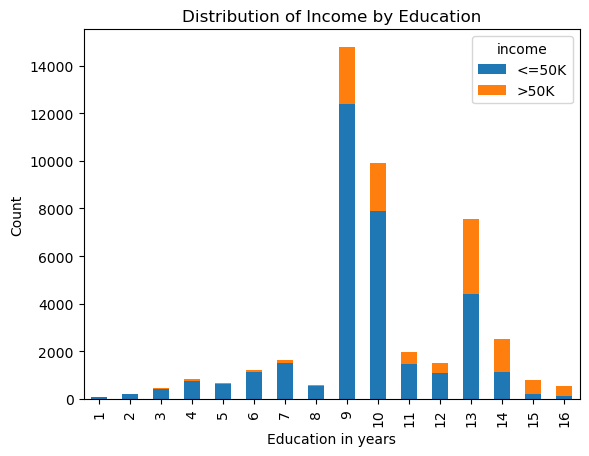

In [17]:
plt.figure(figsize=(10, 6))
df.groupby('educational-num')['income'].value_counts().unstack().plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('Education in years')
plt.ylabel('Count')
plt.title('Distribution of Income by Education')

# Display the plot
plt.show()

This plot shows distribution of individuals across different education levels and their corresponding income levels. It can help visualize the relationship between education and income and identify any income disparities based on education.

## 3.Which occupations have the highest average working hours?

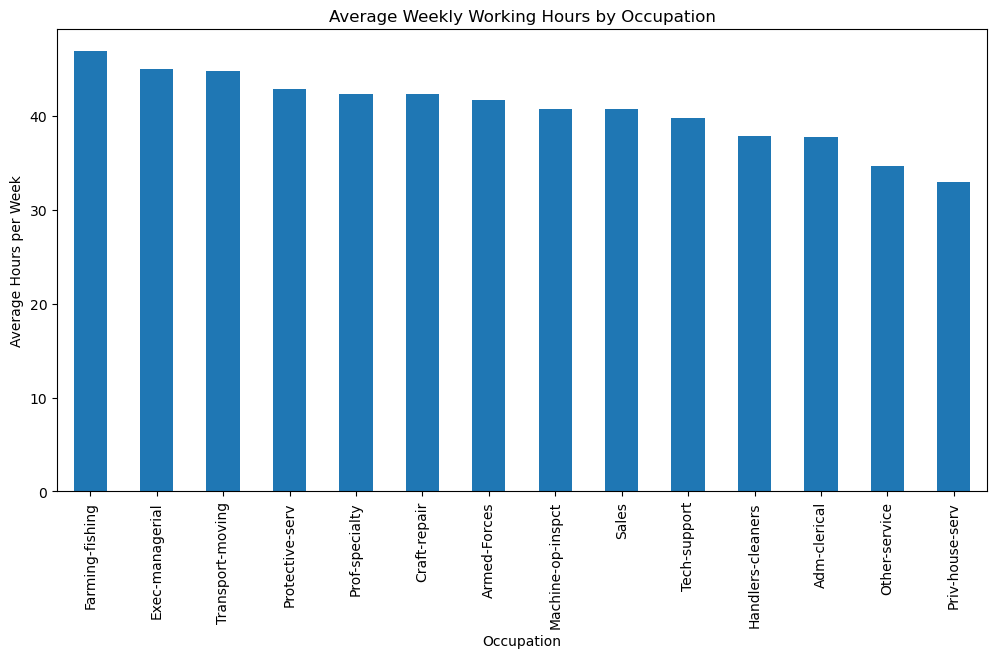

In [18]:

avg_hours_per_week = df.groupby('occupation')['hours-per-week'].mean()

# Sort the data in descending order of average hours per week
avg_hours_per_week = avg_hours_per_week.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
avg_hours_per_week.plot(kind='bar')

# Set plot labels and title
plt.xlabel('Occupation')
plt.ylabel('Average Hours per Week')
plt.title('Average Weekly Working Hours by Occupation')

# Display the plot
plt.show()

## 4.Are there any significant differences in income based on marital status?

<Figure size 800x600 with 0 Axes>

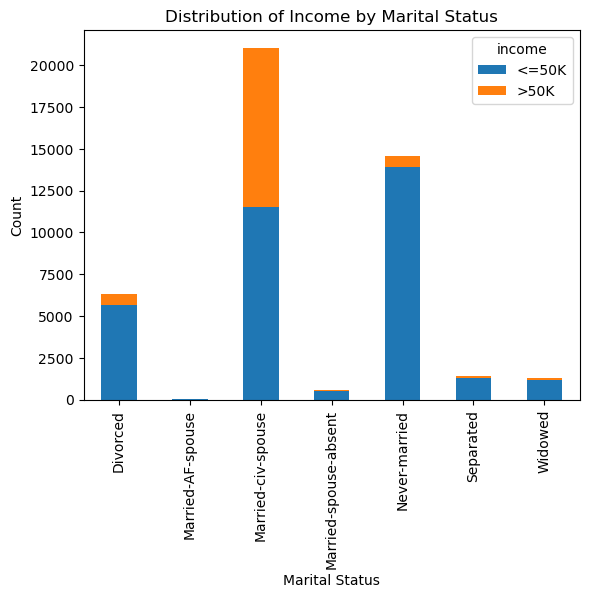

In [19]:
plt.figure(figsize=(8, 6))
df.groupby('marital-status')['income'].value_counts().unstack().plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Income by Marital Status')

# Display the plot
plt.show()

## 5.Is there a gender disparity in educational attainment?

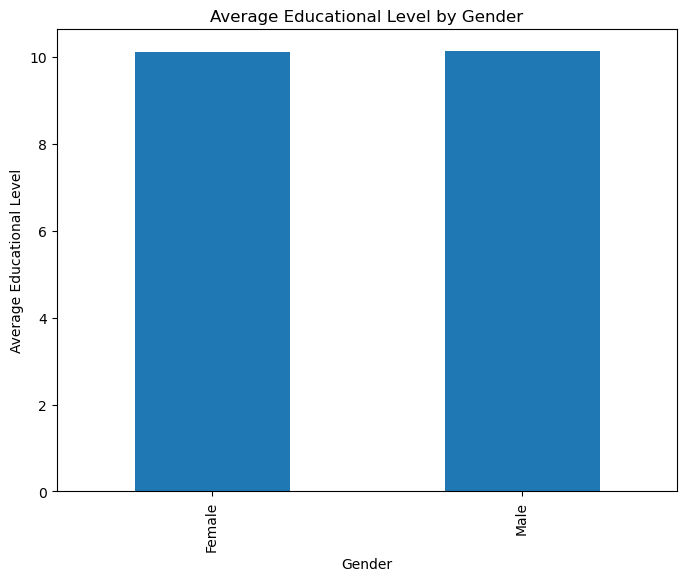

In [20]:
plt.figure(figsize=(8, 6))
df.groupby('gender')['educational-num'].mean().plot(kind='bar')

# Set plot labels and title
plt.xlabel('Gender')
plt.ylabel('Average Educational Level')
plt.title('Average Educational Level by Gender')

# Display the plot
plt.show()

## 6.How does the average income differ between genders?

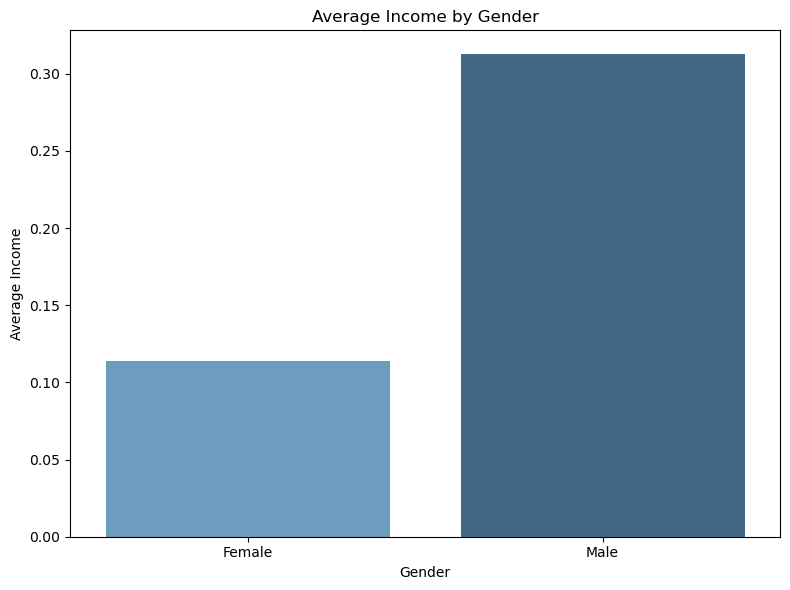

In [21]:
income_mapping = {'<=50K': 0, '>50K': 1}
df['income_num'] = df['income'].map(income_mapping)

# Calculate the average income by gender
avg_income_by_gender = df.groupby('gender')['income_num'].mean()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_income_by_gender.index, y=avg_income_by_gender.values, palette='Blues_d')

# Set plot title and labels
plt.title('Average Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Income')

# Display the plot
plt.tight_layout()
plt.show()

## 7.How does the distribution of income differ among different racial groups?

<Figure size 1000x600 with 0 Axes>

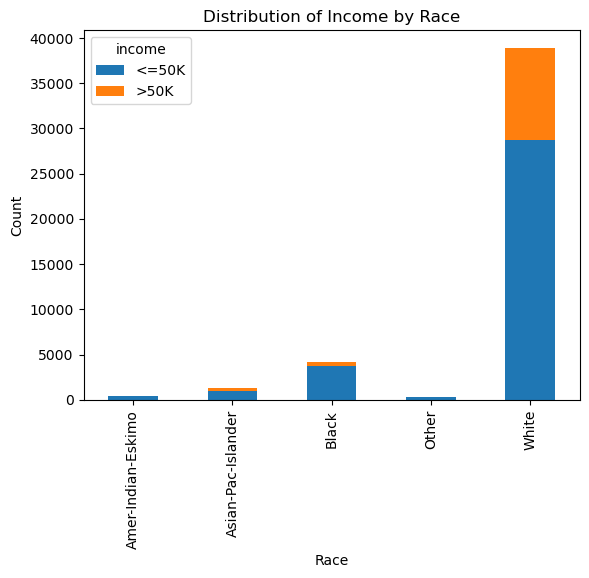

In [22]:
income_race_cross = pd.crosstab(df['race'], df['income'])

# Create the bar plot
plt.figure(figsize=(10, 6))
income_race_cross.plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Income by Race')

# Display the plot
plt.show()

Bar Plot: Race vs. Average Income

x-axis: Race
y-axis: Average Income
Detail: This plot will showcase the average income for each racial group. It can help identify any income disparities based on race and draw attention to the need for equitable opportunities and inclusive policies.

## 8.What is the overall distribution of individuals based on their income levels (<=50K or >50K)?

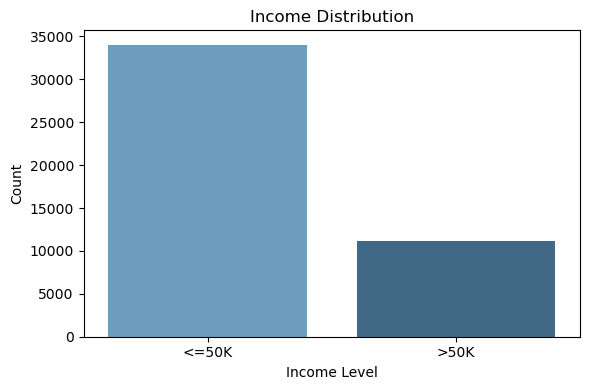

In [23]:
income_counts = df['income'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=income_counts.index, y=income_counts.values, palette='Blues_d')

# Set plot title and labels
plt.title('Income Distribution')
plt.xlabel('Income Level')
plt.ylabel('Count')

# Display the plot
plt.tight_layout()
plt.show()

## 9.How does income vary across different age groups?

<Figure size 1000x600 with 0 Axes>

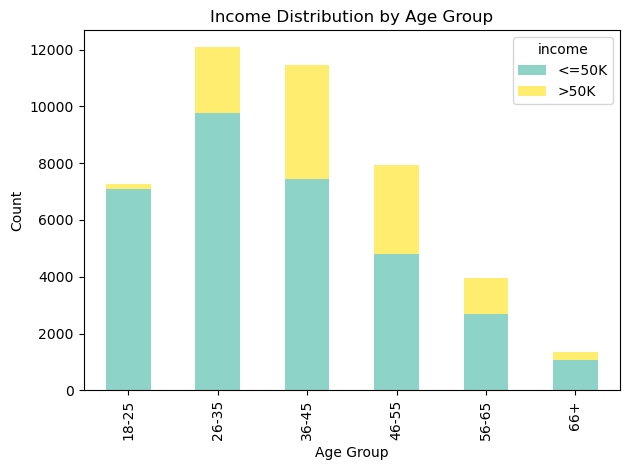

In [24]:
age_groups = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']

# Categorize the ages into groups
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, df['age'].max()], labels=age_groups)

# Calculate the income distribution by age group
income_by_age_group = df.groupby('age_group')['income'].value_counts().unstack().fillna(0)

# Create the stacked bar plot
plt.figure(figsize=(10, 6))
income_by_age_group.plot(kind='bar', stacked=True, colormap='Set3')

# Set plot title and labels
plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Display the plot
plt.tight_layout()
plt.show()

## 10.Which native countries have the highest average incomes?

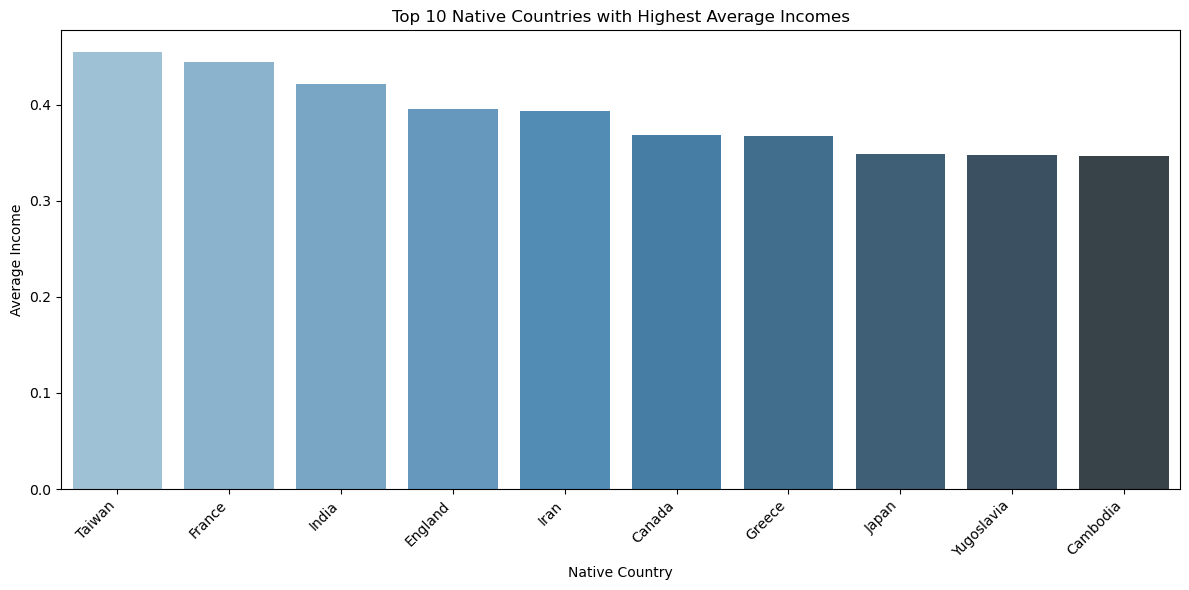

In [25]:
income_mapping = {'<=50K': 0, '>50K': 1}
df['income_num'] = df['income'].map(income_mapping)

# Calculate the average income by native country
avg_income_by_country = df.groupby('native-country')['income_num'].mean().sort_values(ascending=False)

# Select the top 10 countries with the highest average incomes
top_countries = avg_income_by_country.head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Blues_d')

# Set plot title and labels
plt.title('Top 10 Native Countries with Highest Average Incomes')
plt.xlabel('Native Country')
plt.ylabel('Average Income')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

## 11.	which occupations pays more?

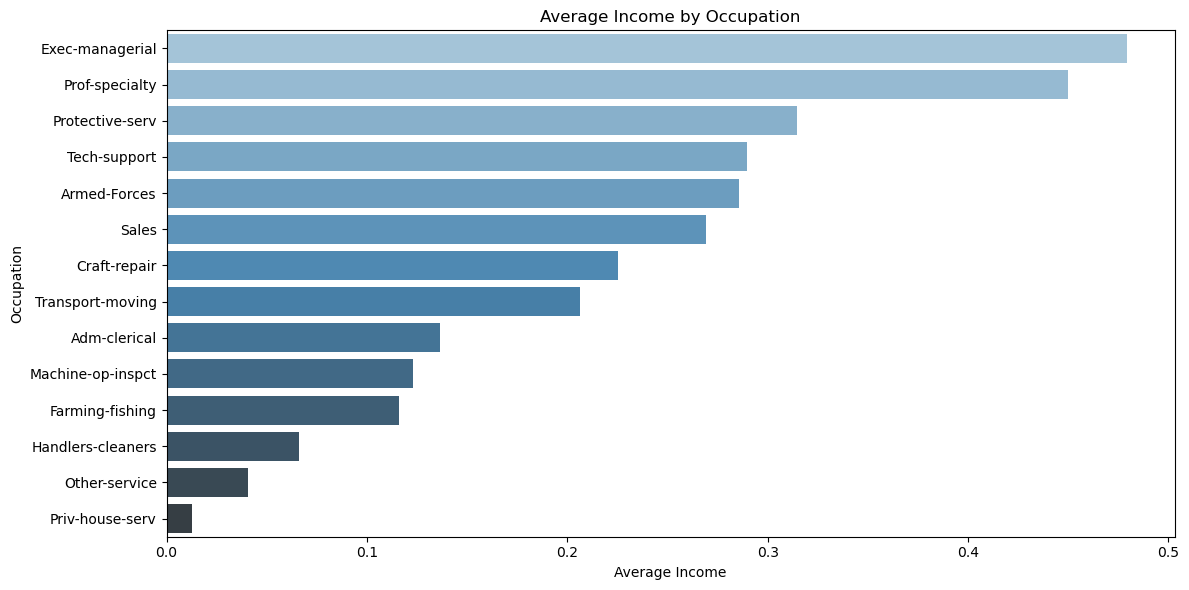

In [26]:
# Calculate the average income by occupation
df['income_num'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
avg_income_by_occupation = df.groupby('occupation')['income_num'].mean().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_income_by_occupation.values, y=avg_income_by_occupation.index, palette='Blues_d')

# Set plot title and labels
plt.title('Average Income by Occupation')
plt.xlabel('Average Income')
plt.ylabel('Occupation')

# Display the plot
plt.tight_layout()
plt.show()

## 12.Are there any notable relationships between occupation and education level?

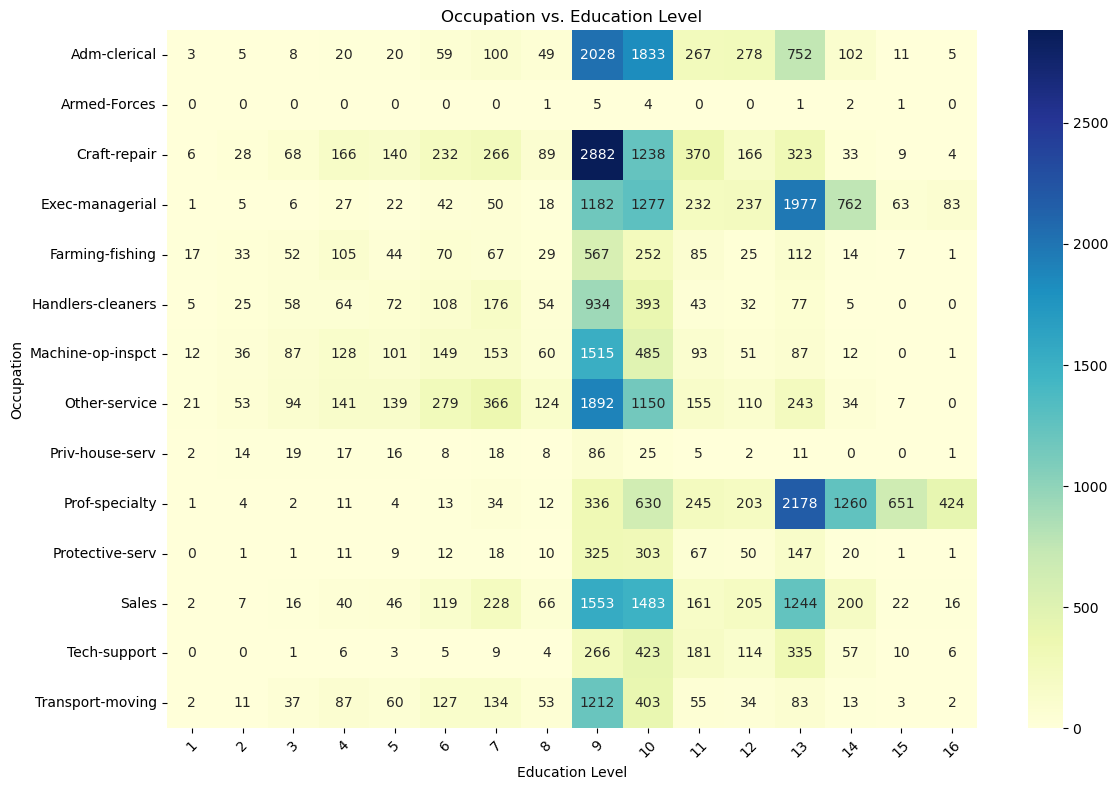

In [27]:
occupation_education = pd.crosstab(df['occupation'], df['educational-num'])

# Plot the cross-tabulation as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(occupation_education, cmap='YlGnBu', annot=True, fmt='d')

# Set plot title and labels
plt.title('Occupation vs. Education Level')
plt.xlabel('Education Level')
plt.ylabel('Occupation')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

## 13.What are the predominant factors that contribute to higher income levels?

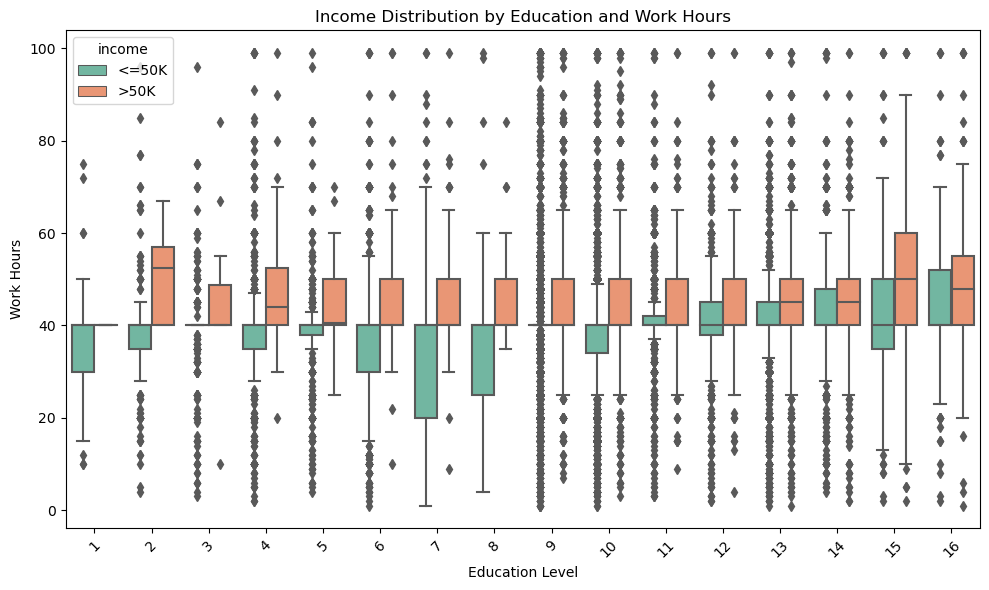

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='educational-num', y='hours-per-week', hue='income', data=df, palette='Set2')

# Set plot title and labels
plt.title('Income Distribution by Education and Work Hours')
plt.xlabel('Education Level')
plt.ylabel('Work Hours')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

<font color=blue>__Based on the visual study of the dataset, the following bulleted points summarize the predominant factors that contribute to higher income levels:__

__Gender:__ Male individuals tend to earn more compared to females, even when considering factors like education, occupation, and work hours.

__Education:__ Higher education levels are associated with higher income levels. Individuals with advanced degrees or higher levels of education generally have higher earning potential.

__Occupation:__ Executive managerial positions are more likely to have higher income levels. Individuals in such positions tend to earn more compared to other occupations.

__Marital Status:__ Being married and having a partner is positively associated with higher income levels. Married individuals often have more financial stability, which can contribute to higher incomes.

__Age:__ Age plays a role in income levels, with older individuals generally having higher incomes. As individuals gain more experience and progress in their careers, their income tends to increase.

__Race:__ Race can influence income levels, with certain racial groups having higher average incomes compared to others. This suggests the presence of racial disparities in income distribution.
    
<font color=blue>In summary, based on the visual analysis, it appears that factors such as gender, education, occupation, marital status, age, and race significantly influence income levels. Additionally, it is noteworthy that the average income for Americans is below $50,000. These findings highlight the complex interplay of various factors in determining income levels and underscore the importance of considering multiple variables when analyzing income disparities and socioeconomic dynamics.
__It's important to note that these observations are based on the visual study of the dataset, and further statistical analysis may be required to validate and quantify the significance of these factors in contributing to higher income levels. Additionally, individual circumstances and other variables not included in the dataset may also impact income levels.__